In [82]:
# import packages

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.mixture import GaussianMixture
from sklearn.compose import make_column_transformer

from sklearn.model_selection import GridSearchCV



In [83]:
url = 'https://raw.githubusercontent.com/min-is/Chapman-University/main/CPSC%20392%20-%20Data%20Science/Final%20Project/high_diamond_ranked_10min.csv'

df = pd.read_csv(url)

df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [84]:
# Counting the missing data per column

null = df.isnull().sum()
null_preDF = {'Number of Missing Datapoints': null}
nullDF = pd.DataFrame(null_preDF)

nullDF

,Number of Missing Datapoints
gameId,0
blueWins,0
blueWardsPlaced,0
blueWardsDestroyed,0
blueFirstBlood,0
blueKills,0
blueDeaths,0
blueAssists,0
blueEliteMonsters,0
blueDragons,0


In [85]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [86]:
# Linear Regression

# all variables in the dataset
predictors = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 
'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 
'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# all continuous/interval variables in the data
contin = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 
'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 
'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

X = df[predictors]
y = df['blueWins']

# TTS with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["blueWins"], test_size = 0.2)

z = StandardScaler()
X_train[contin] = z.fit_transform(X_train[contin])
X_test[contin] = z.transform(X_test[contin])

linear = LinearRegression()
linReg = linear.fit(X_train, y_train)

print('The R2 value for the train set is :', linReg.score(X_train, y_train))
print('The R2 value for the test set is :', linReg.score(X_test, y_test))


The R2 value for the train set is : 0.2811003054838451
The R2 value for the test set is : 0.27947322553576126


The accuracy for Logistic Regression is:  0.7408906882591093


c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names


Text(0.5, 1.0, 'Confusion matrix of the classifier')

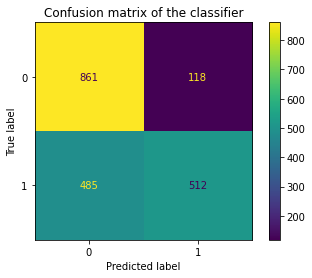

In [87]:
# Logistic Regression

predictors = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 
'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 
'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# all continuous/interval variables in the data
contin = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 
'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 
'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

X = df[predictors]
y = df['blueWins']

# TTS with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["blueWins"], test_size = 0.2)

z = StandardScaler()
z.fit(X_train)
Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)

logR = LogisticRegression()

logR.fit(Xz_train,y_train)

predictedVals = logR.predict(Xz_test)

print('The accuracy for Logistic Regression is: ', accuracy_score(y_test, predictedVals))

logistic_regression = accuracy_score(y_test, predictedVals)

plot_confusion_matrix(logR, X_test, y_test)
plt.title('Confusion matrix of the classifier')

Accuracy for our training dataset with tuning is :  0.7249145893964317
Accuracy for our test dataset with tuning is :  0.7267206477732794
The best max_depth value was found to be:  1


c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

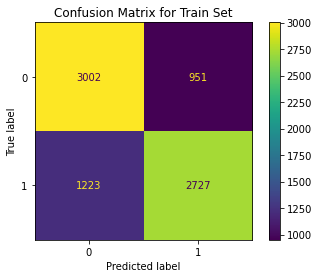

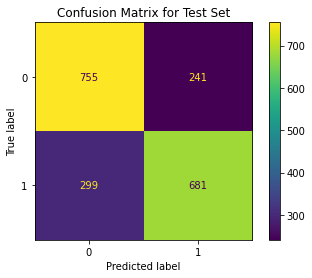

In [88]:
# Decision Tree

predictors = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 
'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 
'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# all continuous/interval variables in the data
contin = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 
'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 
'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

X = df[predictors]
y = df['blueWins']

# TTS with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["blueWins"], test_size = 0.2)

z = make_column_transformer((StandardScaler(), contin))

tree = DecisionTreeClassifier()

pipe = make_pipeline(z, tree)

pipe.get_params().keys()

depths = {"decisiontreeclassifier__max_depth": range(1,20)}

gridDT = GridSearchCV(pipe, depths, scoring = 'accuracy', cv = 10, refit = True)

dtmod = gridDT.fit(X_train, y_train)

print('Accuracy for our training dataset with tuning is : ', dtmod.score(X_train, y_train))
print('Accuracy for our test dataset with tuning is : ', dtmod.score(X_test, y_test))

print('The best max_depth value was found to be: ', dtmod.best_estimator_.get_params()['decisiontreeclassifier__max_depth'])

decision_tree = dtmod.score(X_test, y_test)

plot_confusion_matrix(dtmod, X_train, y_train)
plt.title('Confusion Matrix for Train Set')

plot_confusion_matrix(dtmod, X_test, y_test)
plt.title('Confusion Matrix for Test Set')


Accuracy for our training dataset with tuning is :  0.7357965329621663
Accuracy for our test dataset with tuning is :  0.7206477732793523
The best k value was found to be:  49


c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
c:\Users\Isaac Min\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Text(0.5, 1.0, 'Confusion Matrix for Test Set')

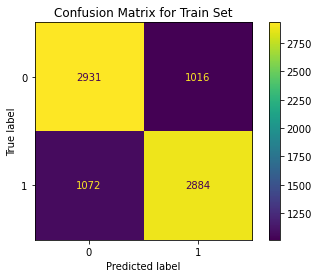

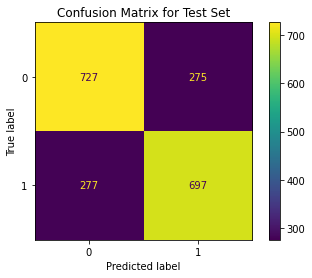

In [89]:
# K-Nearest Neighbors

predictors = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 
'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 
'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# all continuous/interval variables in the data
contin = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 
'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 
'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 
'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 
'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

X = df[predictors]
y = df['blueWins']

# TTS with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["blueWins"], test_size = 0.2)

knn = KNeighborsClassifier()

z = make_column_transformer((StandardScaler(), contin))

pipe = make_pipeline(z, knn)

pipe.get_params().keys()

ks = {'kneighborsclassifier__n_neighbors': range(1,50)}

gridKNN = GridSearchCV(pipe, ks, scoring = 'accuracy', cv = 10, refit = True)

knnmod = gridKNN.fit(X_train, y_train)

# finding the accuracy of the training/test datasets
print('Accuracy for our training dataset with tuning is : ', knnmod.score(X_train, y_train))
print('Accuracy for our test dataset with tuning is : ', knnmod.score(X_test, y_test))

# getting the k value used for the KNN model
print('The best k value was found to be: ', knnmod.best_estimator_.get_params()['kneighborsclassifier__n_neighbors'])

k_nearest_neighbors = knnmod.score(X_test, y_test)

# plotting the confusion matrices
plot_confusion_matrix(knnmod, X_train, y_train)
plt.title('Confusion Matrix for Train Set')

plot_confusion_matrix(knnmod, X_test, y_test)
plt.title('Confusion Matrix for Test Set')


In [90]:
Model = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']
Accuracy = [logistic_regression, decision_tree, k_nearest_neighbors]

toAccDF = {'Model': Model, 'Accuracy': Accuracy}

accDF = pd.DataFrame(toAccDF)

accDF

,Model,Accuracy
0,Logistic Regression,0.740891
1,Decision Tree,0.726721
2,K-Nearest Neighbors,0.720648


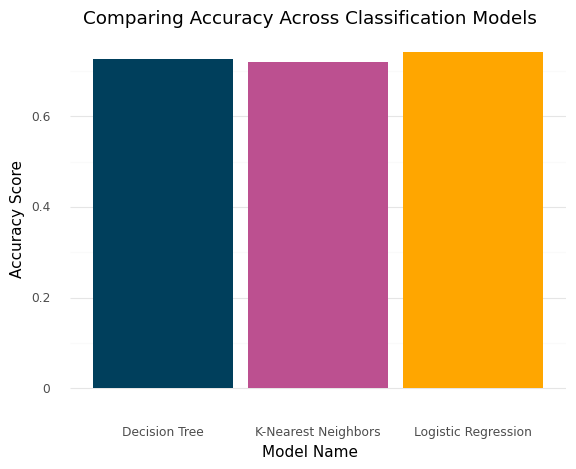

<ggplot: (142179095745)>

In [91]:
(ggplot(accDF, aes(x = 'Model', y = 'Accuracy')) + geom_bar(aes(fill = 'Model'), stat = 'identity') +
 theme_bw() + ggtitle('Comparing Accuracy Across Classification Models') + theme_minimal() + 
 theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(), legend_position = 'none') + 
 labs(x = 'Model Name', y = 'Accuracy Score') + scale_fill_manual(["#003f5c", "#bc5090", "#ffa600"]))

Question 2

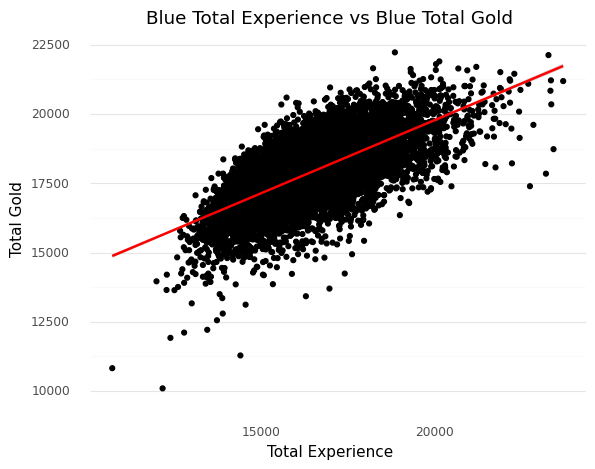

<ggplot: (142184643446)>

In [92]:
df1 = df[['blueTotalGold', 'blueTotalExperience', 'redTotalGold', 'redTotalExperience']].copy()

(ggplot(df1, aes(x = 'blueTotalGold', y = 'blueTotalExperience')) + geom_point() + geom_smooth(method = 'lm', color = 'red') +
 theme_bw() + ggtitle('Blue Total Experience vs Blue Total Gold') + theme_minimal() + 
 theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(), legend_position = 'none') + 
 labs(x = 'Total Experience', y = 'Total Gold'))

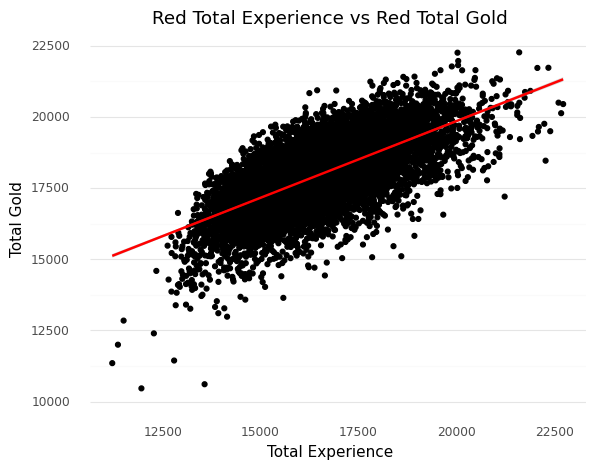

<ggplot: (142186720034)>

In [93]:
(ggplot(df1, aes(x = 'redTotalGold', y = 'redTotalExperience')) + geom_point() + geom_smooth(method = 'lm', color = 'red') +
 theme_bw() + ggtitle('Red Total Experience vs Red Total Gold') + theme_minimal() + 
 theme(panel_grid_major_x = element_blank(), panel_grid_minor_x = element_blank(), legend_position = 'none') + 
 labs(x = 'Total Experience', y = 'Total Gold'))

Question 3

In [94]:
df2 = df[['blueTotalMinionsKilled', 'blueTotalExperience', 'blueKills', 'redTotalMinionsKilled', 'redTotalExperience', 
'redKills']]

df2.head()

,blueTotalMinionsKilled,blueTotalExperience,blueKills,redTotalMinionsKilled,redTotalExperience,redKills
0,195,17039,9,197,17047,6
1,174,16265,5,240,17438,5
2,186,16221,7,203,17254,11
3,201,17954,4,235,17961,5
4,210,18543,6,225,18313,6


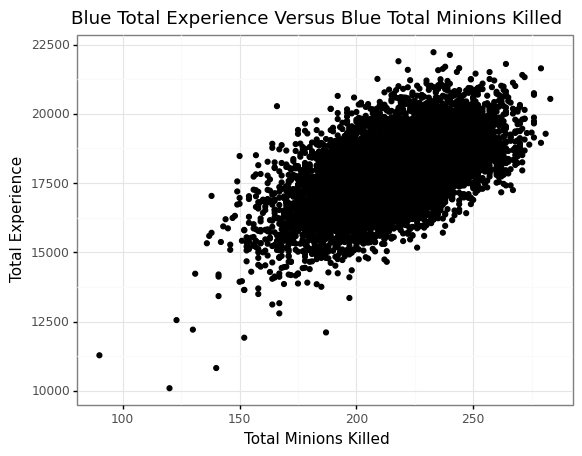

<ggplot: (142186214084)>

In [95]:
(ggplot(df2, aes(x = 'blueTotalMinionsKilled', y = 'blueTotalExperience')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Blue Total Experience Versus Blue Total Minions Killed') + 
labs(x = 'Total Minions Killed', y = 'Total Experience'))

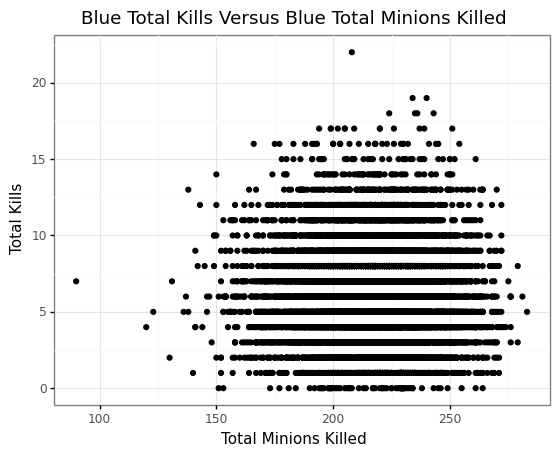

<ggplot: (142179621605)>

In [96]:
(ggplot(df2, aes(x = 'blueTotalMinionsKilled', y = 'blueKills')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Blue Total Kills Versus Blue Total Minions Killed') + 
labs(x = 'Total Minions Killed', y = 'Total Kills'))

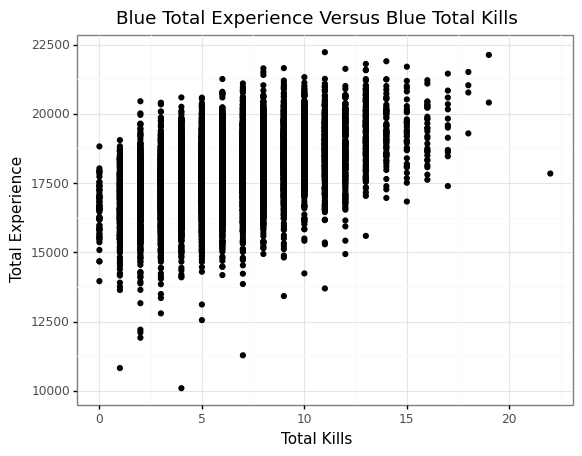

<ggplot: (142182299100)>

In [97]:
(ggplot(df2, aes(x = 'blueKills', y = 'blueTotalExperience')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Blue Total Experience Versus Blue Total Kills') + 
labs(x = 'Total Kills', y = 'Total Experience'))

C:\Users\Isaac Min\AppData\Local\Temp\ipykernel_54128\2275031061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.3015527016804006, 0.28402685702072966, 0.2719081559478912, 0.2586611014555127, 0.24746088382561393, 0.2345770731638094, 0.2232898033084657, 0.2294151528067657, 0.2282300072546454, 0.2236538553112317, 0.21698303667160138, 0.2135857549859103, 0.22245193384895573]


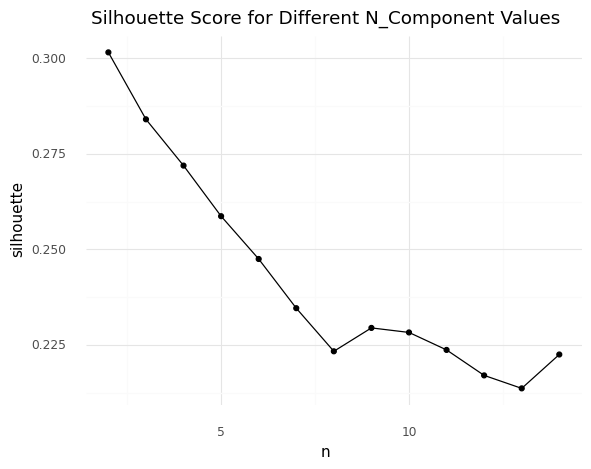

<ggplot: (142182091099)>

In [98]:
features = ['blueTotalMinionsKilled', 'blueTotalExperience', 'blueKills']

X = df2[features]

# z-scoring
z = StandardScaler()
X[features] = z.fit_transform(X)
Xdf = X

# finding the best n_components value
sils = []
n_components = [2,3,4,5,6,7,8,9,10,11,12,13,14]

for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    pred = gmm.predict(X)

    sils.append(silhouette_score(X, pred))

print(sils)

# saving silhouette scores and n_components to dataframe 
sils_df = pd.DataFrame({"n": n_components,
                      "silhouette": sils})

#plot
(ggplot(sils_df, aes(x = "n", y = "silhouette")) + geom_point() + geom_line() + 
theme_minimal() + labs(title = "Silhouette Score for Different N_Component Values"))

In [99]:
EM = GaussianMixture(n_components = 2)
EM.fit(X)

EMcluster = EM.predict(X)
X['EM_Clusters'] = EMcluster
print(silhouette_score(X, EMcluster))

C:\Users\Isaac Min\AppData\Local\Temp\ipykernel_54128\146242162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.36283934056220557


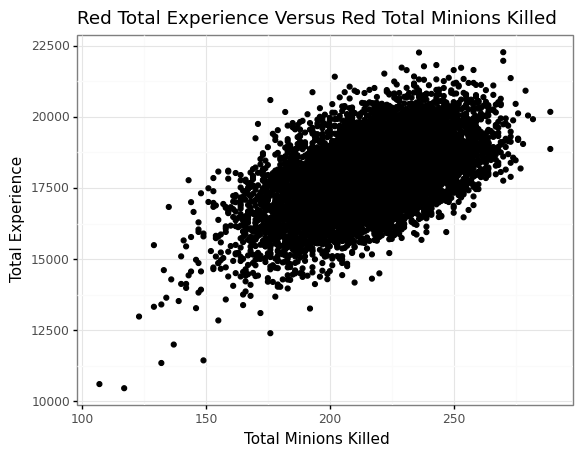

<ggplot: (142180361051)>

In [100]:
(ggplot(df2, aes(x = 'redTotalMinionsKilled', y = 'redTotalExperience')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Red Total Experience Versus Red Total Minions Killed') + 
labs(x = 'Total Minions Killed', y = 'Total Experience'))

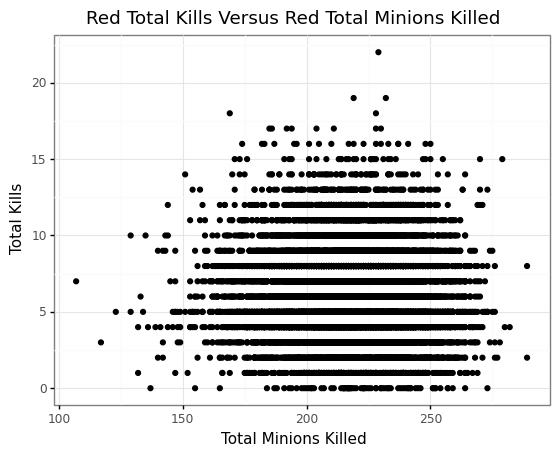

<ggplot: (142180228244)>

In [101]:
(ggplot(df2, aes(x = 'redTotalMinionsKilled', y = 'redKills')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Red Total Kills Versus Red Total Minions Killed') + 
labs(x = 'Total Minions Killed', y = 'Total Kills'))

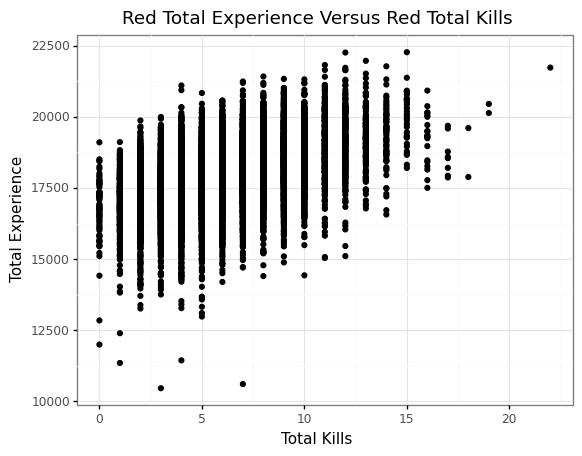

<ggplot: (142180298129)>

In [102]:
(ggplot(df2, aes(x = 'redKills', y = 'redTotalExperience')) + geom_point() + 
theme_minimal() + theme_bw() + ggtitle('Red Total Experience Versus Red Total Kills') + 
labs(x = 'Total Kills', y = 'Total Experience'))

C:\Users\Isaac Min\AppData\Local\Temp\ipykernel_54128\3721598948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.28744767711208735, 0.27366631998647395, 0.27024777463889543, 0.26334875626638843, 0.24287451065857854, 0.25297084331563424, 0.24349393047591106, 0.2310044720931213, 0.2198464912103513, 0.22062963123574303, 0.2174640066565895, 0.2151861882482744, 0.21203452114573731]


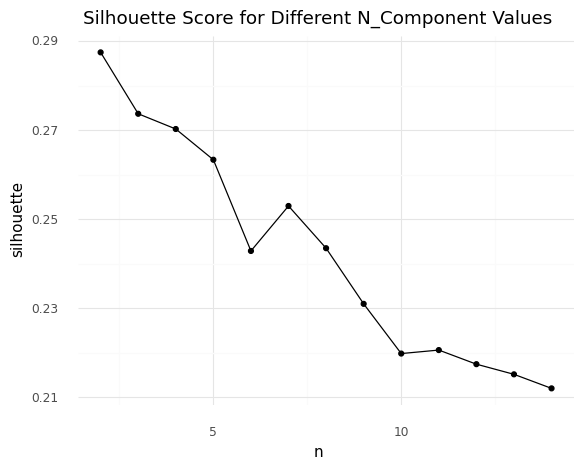

<ggplot: (142182051039)>

In [103]:
features = ['redTotalMinionsKilled', 'redTotalExperience', 'redKills']

X = df2[features]

# z-scoring
z = StandardScaler()
X[features] = z.fit_transform(X)
Xdf = X

# finding the best n_components value
sils = []
n_components = [2,3,4,5,6,7,8,9,10,11,12,13,14]

for n in n_components:
    gmm = GaussianMixture(n_components = n)
    gmm.fit(X)
    pred = gmm.predict(X)

    sils.append(silhouette_score(X, pred))

print(sils)

# saving silhouette scores and n_components to dataframe 
sils_df = pd.DataFrame({"n": n_components,
                      "silhouette": sils})

#plot
(ggplot(sils_df, aes(x = "n", y = "silhouette")) + geom_point() + geom_line() + 
theme_minimal() + labs(title = "Silhouette Score for Different N_Component Values"))

In [104]:
EM = GaussianMixture(n_components = 2)
EM.fit(X)

EMcluster = EM.predict(X)
X['EM_Clusters'] = EMcluster
print(silhouette_score(X, EMcluster))

C:\Users\Isaac Min\AppData\Local\Temp\ipykernel_54128\146242162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.35100887566458533
